# Bước 0:

In [72]:
import pandas as pd
url = "https://raw.githubusercontent.com/huongd17at089/income_prediction/master/data_adult.csv"
df = pd.read_csv(url)

In [3]:
df.head(5)

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,1,1,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,2,2,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,3,3,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,4,4,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,5,5,34,Private,10th,6,Never-married,White,Male,30,<=50K


In [4]:
df.tail(5)

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
46028,46029,46029,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46029,46030,46030,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K
46030,46031,46031,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K
46031,46032,46032,22,Private,HS-grad,9,Never-married,White,Male,20,<=50K
46032,46033,46033,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,White,Female,40,>50K


In [79]:
df = df.drop(["X", "Unnamed: 0"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.2+ MB


In [6]:
print(any(df.duplicated().tolist()))

False


In [61]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [70]:
df.loc[ df.income == ">50K", "income"] = 1
df.loc[ df.income == "<=50K", "income"] = 0
df.income = df.income.astype("int64")
print(df.dtypes)

age                 int64
workclass          object
education          object
educational.num     int64
marital.status     object
race               object
gender             object
hours.per.week      int64
income              int64
dtype: object


In [7]:
continuous_vars = ["age", "educational.num", "hours.per.week"]
categorical_vars = ["workclass", "education", "marital.status", "race", "gender"]
target = "income"

# Bước 1

In [8]:
df1 = df[continuous_vars]
df1.sample(5)

,age,educational.num,hours.per.week
19683,61,9,55
4104,46,10,40
29438,27,3,40
28587,27,10,40
10040,30,6,40


In [9]:
df1.describe()

,age,educational.num,hours.per.week
count,46033.000000,46033.000000,46033.000000
mean,38.556601,10.128929,40.948407
std,13.204268,2.564064,12.011069
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


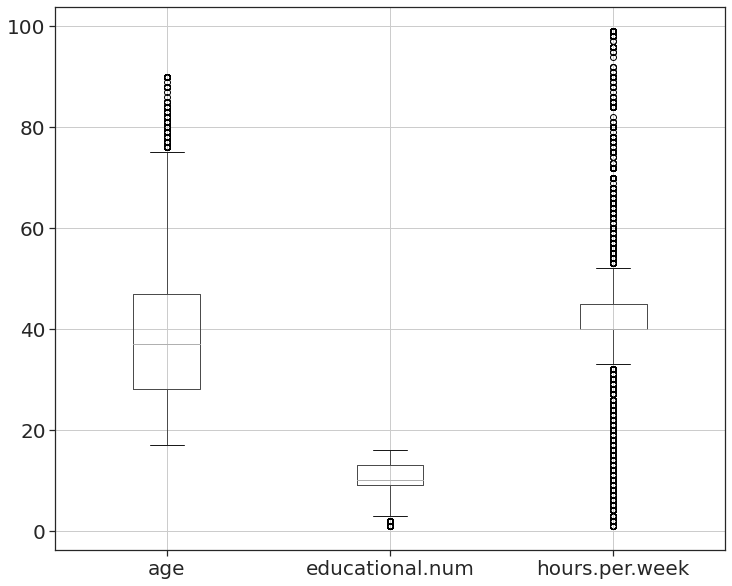

In [31]:
boxplot = df.boxplot(column=continuous_vars, figsize=(12, 10), fontsize=20)

In [71]:
df.corr()

,age,educational.num,hours.per.week,income
age,1.000000,0.037566,0.102185,0.237338
educational.num,0.037566,1.000000,0.145151,0.332293
hours.per.week,0.102185,0.145151,1.000000,0.226795
income,0.237338,0.332293,0.226795,1.000000


#Bước 2

In [95]:
df2 = df[categorical_vars]
df2.sample(5)

,workclass,education,marital.status,race,gender
19832,Federal-gov,Some-college,Divorced,Black,Female
44641,Private,Some-college,Married-civ-spouse,White,Male
28782,Federal-gov,Masters,Married-civ-spouse,White,Male
6540,Private,Some-college,Never-married,White,Male
38971,Private,HS-grad,Divorced,White,Male


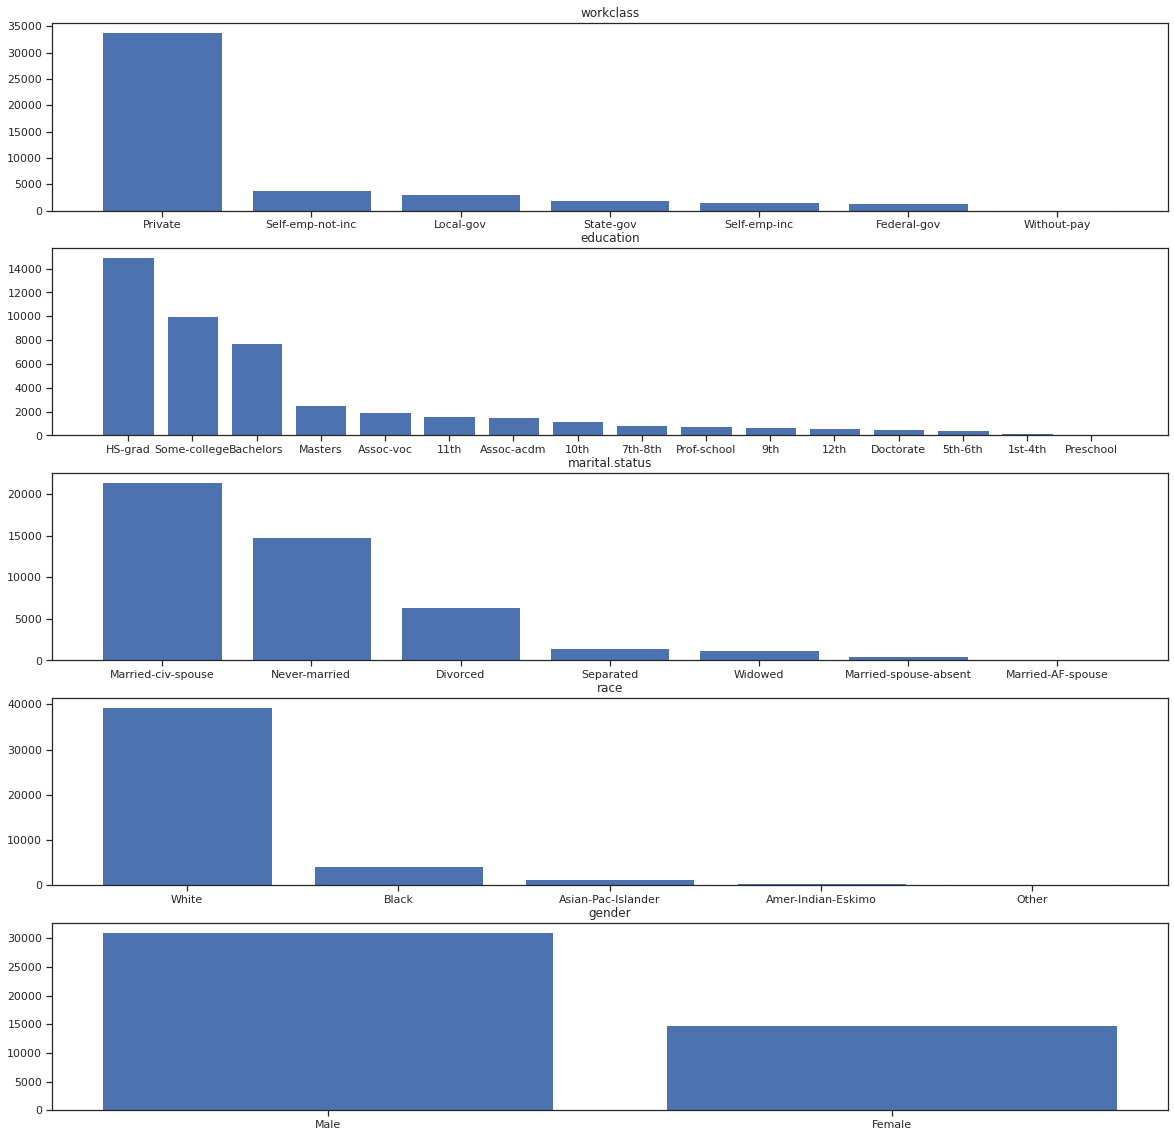

In [121]:
# from matplotlib import pyplot as plt
fig,axes = plt.subplots(len(categorical_vars),figsize=(20,20))
for ind,var in enumerate(categorical_vars):
  info = pd.DataFrame()
  info["Frequency"] = df[var].value_counts()
  info["Percentage"] = info["Frequency"]/df2.shape[0]*100
  # print(info)
  # print(info[info["Frequency"] == max(info["Frequency"])])
  # print("-----------------------------------------------------------")
  axes[ind].bar(info.index, height=info["Frequency"])
  axes[ind].set_title(var)

**Nháp**

In [80]:
data = df.copy()
data["income"].unique()


array(['<=50K', '>50K'], dtype=object)

In [81]:
data.loc[ data.income == ">50K", "income"] = 0
data.loc[ data.income == "<=50K", "income"] = 1
data

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,1
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,0
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,0
4,34,Private,10th,6,Never-married,White,Male,30,1
...,...,...,...,...,...,...,...,...,...
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,1
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,0
46030,58,Private,HS-grad,9,Widowed,White,Female,40,1
46031,22,Private,HS-grad,9,Never-married,White,Male,20,1


In [82]:
data.income = data.income.astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


In [83]:
print(data.corr())

                      age  educational.num  hours.per.week    income
age              1.000000         0.037566        0.102185 -0.237338
educational.num  0.037566         1.000000        0.145151 -0.332293
hours.per.week   0.102185         0.145151        1.000000 -0.226795
income          -0.237338        -0.332293       -0.226795  1.000000


In [59]:
from scipy import stats
import numpy as np

a = data.age.values
b = data.income.values

print(np.corrcoef(a, b))

[[1.         0.23733761]
 [0.23733761 1.        ]]
